In [38]:
import os 
import pickle
import numpy as np
import pandas as pd 
from glob import glob 
from sklearn.metrics import accuracy_score, classification_report
from scipy.spatial.distance import mahalanobis

import seaborn as sns

In [39]:
def dtw_distance(x, y, dist='euclidean'):
    m, n = len(x), len(y)
    dtw = np.zeros((m+1, n+1))
    
    # Initialize the first row and column of the DTW matrix
    for i in range(1, m+1):
        dtw[i, 0] = float('inf')
    for j in range(1, n+1):
        dtw[0, j] = float('inf')
    dtw[0, 0] = 0
    
    # Compute the DTW matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            if dist == 'euclidean':
              cost = euclidean_distance(x[i-1], y[j-1])  # Distance measure between elements x[i-1] and y[j-1]
            if dist == 'mahalanobis':
              cost = mahalanobis_distance(x[i-1], y[j-1])
            dtw[i, j] = cost + min(dtw[i-1, j], dtw[i, j-1], dtw[i-1, j-1])
    
    return dtw[m, n]

def euclidean_distance(a, b):
    # Calculate the distance between two elements a and b
    # Modify this function to use an appropriate distance measure for your multivariate time series
    
    # For example, Euclidean distance can be used as follows:
    return np.linalg.norm(a - b)
    
    # Alternatively, you can use other distance measures like Manhattan distance or cosine similarity
    # pass

def mahalanobis_distance(a, b):
    # Calculate the Mahalanobis distance between two elements a and b
    # cov is the covariance matrix
    # cov = np.array([[1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    #                 [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
    #                 [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
    #                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.],])
    
    cov = np.array([[1., 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [1., 1. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0., 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,0. , 0. , 0. , 0. , 0. , 0. ,],
                    [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.,  0.,  0.,  0.,  0.,  0.,],
                    [0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.,  0.,  0.,  0.,  0.,  0.,],
                    [0., 0., 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0. , 0. ,0.5, 0.5, 0. , 0. , 0. , 0. ,],
                    [0., 0., 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 0. , 0. ,0.5, 0.5, 0. , 0. , 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,0. , 0. , 0.5, 0.5, 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,0. , 0. , 0.5, 0.5, 0. , 0. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,1. , 1. , 0. , 0. , 0.5, 0.5,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,1. , 1. , 0. , 0. , 0.5, 0.5,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.,  0.,  1.,  1.,  0.,  0.,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.,  0.,  1.,  1.,  0.,  0.,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0.5, 0.5, 0. , 0. , 1. , 1. ,],
                    [0., 0., 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,0.5, 0.5, 0. , 0. , 1. , 1. ,]])
    # Calculate the Mahalanobis distance using the scipy.spatial.distance.mahalanobis function
    return mahalanobis(a, b, cov)




---

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
data_root = '/content/drive/MyDrive/22_FYP42 - Zero-shot Explainable HAR/CIKM/Ablation Study/study2/'

In [42]:
with open(f"{data_root}skeleton_label_predictions.pickle", 'rb') as handle:
    pred_skeleton_data = pickle.load(handle)

In [43]:
with open(f"{data_root}skeleton_original_seq.pickle", 'rb') as handle:
    origin_skeleton_data = pickle.load(handle)

---

In [44]:
pred_df = pd.DataFrame().from_records(pred_skeleton_data['label'])
pred_df.head()

,id,target,prediction
0,0,house cleaning,house cleaning
1,1,standing,ascending stairs
2,2,house cleaning,house cleaning
3,3,house cleaning,house cleaning
4,4,watching TV,watching TV


---

In [45]:
# PAMAP2
pamap2_super_dict = {
    'Static activities': ['lying', 'sitting', 'standing'],
    'Walking activities': ['walking', 'Nordic walking', 'ascending stairs', 'descending stairs'],
    'House chores': ['vacuum cleaning', 'ironing', 'folding laundry', 'house cleaning'],
    'Sports': ['running', 'cycling', 'playing soccer', 'rope jumping'],
    'Sitting activities': ['watching TV', 'computer work', 'car driving']
}


---

In [46]:
super_class = {}
for i,j in pamap2_super_dict.items():
    for c in j:
        super_class[c] = i 

In [47]:
super_class

{'lying': 'Static activities',
 'sitting': 'Static activities',
 'standing': 'Static activities',
 'walking': 'Walking activities',
 'Nordic walking': 'Walking activities',
 'ascending stairs': 'Walking activities',
 'descending stairs': 'Walking activities',
 'vacuum cleaning': 'House chores',
 'ironing': 'House chores',
 'folding laundry': 'House chores',
 'house cleaning': 'House chores',
 'running': 'Sports',
 'cycling': 'Sports',
 'playing soccer': 'Sports',
 'rope jumping': 'Sports',
 'watching TV': 'Sitting activities',
 'computer work': 'Sitting activities',
 'car driving': 'Sitting activities'}

---

In [48]:
def match_func(r):
  i = r['id']
  i_skel = pred_skeleton_data['data'][i]
  cs, dists = [], []
  for c,f in origin_skeleton_data.items():
    dists.append(dtw_distance(f, i_skel))
    cs.append(c)
  matching_class = cs[np.argmin(np.array(dists))]
  return matching_class

In [49]:
pred_df['matching'] = pred_df.apply(lambda r: match_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching
0,0,house cleaning,house cleaning,vacuum cleaning
1,1,standing,ascending stairs,cycling
2,2,house cleaning,house cleaning,ironing
3,3,house cleaning,house cleaning,vacuum cleaning
4,4,watching TV,watching TV,computer work


In [50]:
def score_func(r):
  i = r['id']
  i_skel = pred_skeleton_data['data'][i]
  cs, dists = [], []
  for c,f in origin_skeleton_data.items():
    dists.append(dtw_distance(f, i_skel))
    cs.append(c)
  matching_class = np.min(np.array(dists))
  return matching_class

In [51]:
pred_df['matching_dtw_dist'] = pred_df.apply(lambda r: score_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist
0,0,house cleaning,house cleaning,vacuum cleaning,3.025906
1,1,standing,ascending stairs,cycling,9.979603
2,2,house cleaning,house cleaning,ironing,4.370120
3,3,house cleaning,house cleaning,vacuum cleaning,3.217930
4,4,watching TV,watching TV,computer work,3.047404


---

In [52]:
pred_df['super_target'] = pred_df['target'].map(super_class)
pred_df['super_prediction'] = pred_df['prediction'].map(super_class)
pred_df['super_matching'] = pred_df['matching'].map(super_class)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching
0,0,house cleaning,house cleaning,vacuum cleaning,3.025906,House chores,House chores,House chores
1,1,standing,ascending stairs,cycling,9.979603,Static activities,Walking activities,Sports
2,2,house cleaning,house cleaning,ironing,4.370120,House chores,House chores,House chores
3,3,house cleaning,house cleaning,vacuum cleaning,3.217930,House chores,House chores,House chores
4,4,watching TV,watching TV,computer work,3.047404,Sitting activities,Sitting activities,Sitting activities


In [53]:
pred_df['correct'] = (pred_df['target'] == pred_df['prediction']).astype(int)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct
0,0,house cleaning,house cleaning,vacuum cleaning,3.025906,House chores,House chores,House chores,1
1,1,standing,ascending stairs,cycling,9.979603,Static activities,Walking activities,Sports,0
2,2,house cleaning,house cleaning,ironing,4.370120,House chores,House chores,House chores,1
3,3,house cleaning,house cleaning,vacuum cleaning,3.217930,House chores,House chores,House chores,1
4,4,watching TV,watching TV,computer work,3.047404,Sitting activities,Sitting activities,Sitting activities,1


In [54]:
# super class accuracy 
correct_df = pred_df.loc[pred_df['correct'] == 1, :]
print(accuracy_score(y_true=correct_df['super_prediction'], y_pred=correct_df['super_matching']))
print(classification_report(y_true=correct_df['super_prediction'], y_pred=correct_df['super_matching'], zero_division=0))

0.8571428571428571
                    precision    recall  f1-score   support

      House chores       1.00      0.93      0.96        14
Sitting activities       0.75      1.00      0.86         6
            Sports       0.00      0.00      0.00         0
 Static activities       1.00      0.88      0.94        17
Walking activities       0.89      0.67      0.76        12

          accuracy                           0.86        49
         macro avg       0.73      0.70      0.70        49
      weighted avg       0.94      0.86      0.89        49



In [55]:
# super class tendency - predictiion super class 
incorrect_df = pred_df.loc[pred_df['correct'] == 0, :]
print(accuracy_score(y_true=incorrect_df['super_prediction'][:-1], y_pred=incorrect_df['super_matching'][:-1]))
print(classification_report(y_true=incorrect_df['super_prediction'][:-1], y_pred=incorrect_df['super_matching'][:-1], zero_division=0))

0.5714285714285714
                    precision    recall  f1-score   support

      House chores       1.00      0.75      0.86         4
Sitting activities       0.00      0.00      0.00         0
            Sports       0.00      0.00      0.00         0
 Static activities       1.00      0.50      0.67         4
Walking activities       1.00      0.50      0.67         6

          accuracy                           0.57        14
         macro avg       0.60      0.35      0.44        14
      weighted avg       1.00      0.57      0.72        14



In [56]:
# super class tendency - predictiion super class 
incorrect_df = pred_df.loc[pred_df['correct'] == 0, :]
print(accuracy_score(y_true=incorrect_df['super_target'][:-1], y_pred=incorrect_df['super_matching'][:-1]))
print(classification_report(y_true=incorrect_df['super_target'][:-1], y_pred=incorrect_df['super_matching'][:-1], zero_division=0))

0.14285714285714285
                    precision    recall  f1-score   support

      House chores       0.00      0.00      0.00         4
Sitting activities       1.00      0.67      0.80         3
            Sports       0.00      0.00      0.00         0
 Static activities       0.00      0.00      0.00         7
Walking activities       0.00      0.00      0.00         0

          accuracy                           0.14        14
         macro avg       0.20      0.13      0.16        14
      weighted avg       0.21      0.14      0.17        14



In [57]:
# overall interpretability 
print(accuracy_score(y_true=pred_df['super_prediction'][:-1], y_pred=pred_df['super_matching'][:-1]))
print(classification_report(y_true=pred_df['super_prediction'][:-1], y_pred=pred_df['super_matching'][:-1], zero_division=0))

0.7936507936507936
                    precision    recall  f1-score   support

      House chores       1.00      0.89      0.94        18
Sitting activities       0.60      1.00      0.75         6
            Sports       0.00      0.00      0.00         0
 Static activities       1.00      0.81      0.89        21
Walking activities       0.92      0.61      0.73        18

          accuracy                           0.79        63
         macro avg       0.70      0.66      0.66        63
      weighted avg       0.94      0.79      0.85        63



---

In [21]:
def apply_func(r):
  i = r['id']
  return dtw_distance(origin_skeleton_data[r['matching']], pred_skeleton_data['data'][i])

In [22]:
pred_df['dtw_distance'] = pred_df.apply(lambda r: apply_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct,dtw_distance
0,0,car driving,folding laundry,lying,3.417684,Sitting activities,House chores,Static activities,0,3.417684
1,1,ironing,folding laundry,standing,2.542570,House chores,House chores,Static activities,0,2.542570
2,2,ironing,folding laundry,house cleaning,1.785837,House chores,House chores,House chores,0,1.785837
3,3,ironing,folding laundry,house cleaning,1.807271,House chores,House chores,House chores,0,1.807271
4,4,folding laundry,folding laundry,house cleaning,1.890239,House chores,House chores,House chores,1,1.890239


In [23]:
def apply_func(r):
  i = r['id']
  return dtw_distance(origin_skeleton_data[r['matching']], pred_skeleton_data['data'][i], dist='mahalanobis')

pred_df['mahalanobis_distance'] = pred_df.apply(lambda r: apply_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct,dtw_distance,mahalanobis_distance
0,0,car driving,folding laundry,lying,3.417684,Sitting activities,House chores,Static activities,0,3.417684,5.748514
1,1,ironing,folding laundry,standing,2.542570,House chores,House chores,Static activities,0,2.542570,3.099275
2,2,ironing,folding laundry,house cleaning,1.785837,House chores,House chores,House chores,0,1.785837,2.011149
3,3,ironing,folding laundry,house cleaning,1.807271,House chores,House chores,House chores,0,1.807271,2.172791
4,4,folding laundry,folding laundry,house cleaning,1.890239,House chores,House chores,House chores,1,1.890239,2.299187


In [24]:
pred_df.loc[pred_df['correct'] == 0, :]['dtw_distance'][:-1].mean(), pred_df.loc[pred_df['correct'] == 0, :]['mahalanobis_distance'][:-1].mean()

(6.338452539650735, 7.669885409868384)

In [25]:
pred_df.loc[pred_df['correct'] == 0, :]['dtw_distance'][:-1].std(), pred_df.loc[pred_df['correct'] == 0, :]['mahalanobis_distance'][:-1].std()

(7.61635776523807, 9.179798190349219)

In [26]:
pred_df.loc[pred_df['correct'] == 1, :]['dtw_distance'].mean(), pred_df.loc[pred_df['correct'] == 1, :]['mahalanobis_distance'].mean()

(2.7143285429151156, 3.3316242209586004)

In [27]:
pred_df.loc[pred_df['correct'] == 1, :]['dtw_distance'].std(), pred_df.loc[pred_df['correct'] == 1, :]['mahalanobis_distance'].std()

(2.3489176968153718, 3.0772441371085737)

In [28]:
pred_df.loc[pred_df['correct'] == 1, :].head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct,dtw_distance,mahalanobis_distance
4,4,folding laundry,folding laundry,house cleaning,1.890239,House chores,House chores,House chores,1,1.890239,2.299187
5,5,folding laundry,folding laundry,house cleaning,8.337983,House chores,House chores,House chores,1,8.337983,11.189257
8,8,folding laundry,folding laundry,house cleaning,1.927181,House chores,House chores,House chores,1,1.927181,2.424525
10,10,folding laundry,folding laundry,house cleaning,1.779868,House chores,House chores,House chores,1,1.779868,2.079601
12,12,folding laundry,folding laundry,house cleaning,1.806718,House chores,House chores,House chores,1,1.806718,2.104405


---

In [58]:
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def discrete_frechet_distance(P, Q):
    n = len(P)
    m = len(Q)
    
    # Create a memoization table to store computed distances
    memo = np.full((n, m), -1.0)
    
    def _dfs(i, j):
        if memo[i, j] > -1.0:
            return memo[i, j]
        
        result = 0.0
        
        if i == 0 and j == 0:
            result = euclidean_distance(P[0], Q[0])
        elif i > 0 and j == 0:
            result = max(_dfs(i - 1, 0), euclidean_distance(P[i], Q[0]))
        elif i == 0 and j > 0:
            result = max(_dfs(0, j - 1), euclidean_distance(P[0], Q[j]))
        elif i > 0 and j > 0:
            result = max(
                min(
                    _dfs(i - 1, j),
                    _dfs(i - 1, j - 1),
                    _dfs(i, j - 1)
                ),
                euclidean_distance(P[i], Q[j])
            )
        
        memo[i, j] = result
        return result
    
    return _dfs(n - 1, m - 1)


In [59]:
def skeleton_dfd(skel1, skel2):
  rsh_skel1 = skel1.reshape((60,12,2))
  rsh_skel2 = skel2.reshape((60,12,2))

  total_dist = 0.0
  for j in range(12):
    total_dist += discrete_frechet_distance(rsh_skel1[:,j,:], rsh_skel2[:,j,:])

  return total_dist

In [60]:
def fretch_func(r):
  i = r['id']
  match_class = r['matching']
  i_skel = pred_skeleton_data['data'][i]
  match_skel = origin_skeleton_data[match_class]
  dist = skeleton_dfd(i_skel, match_skel)
  return dist

In [61]:
pred_df['dfd_dist'] = pred_df.apply(lambda r: fretch_func(r), axis=1)
pred_df.head()

,id,target,prediction,matching,matching_dtw_dist,super_target,super_prediction,super_matching,correct,dfd_dist
0,0,house cleaning,house cleaning,vacuum cleaning,3.025906,House chores,House chores,House chores,1,0.231317
1,1,standing,ascending stairs,cycling,9.979603,Static activities,Walking activities,Sports,0,1.719500
2,2,house cleaning,house cleaning,ironing,4.370120,House chores,House chores,House chores,1,0.581530
3,3,house cleaning,house cleaning,vacuum cleaning,3.217930,House chores,House chores,House chores,1,0.249243
4,4,watching TV,watching TV,computer work,3.047404,Sitting activities,Sitting activities,Sitting activities,1,0.282577


In [62]:
pred_df.loc[pred_df['correct'] == 0, :]['matching_dtw_dist'][:-1].mean(), pred_df.loc[pred_df['correct'] == 0, :]['dfd_dist'][:-1].mean()

(8.087814055052537, 0.7022553359364428)

In [63]:
pred_df.loc[pred_df['correct'] == 0, :]['matching_dtw_dist'][:-1].std(), pred_df.loc[pred_df['correct'] == 0, :]['dfd_dist'][:-1].std()

(7.27912496826764, 0.5315930670966785)

In [64]:
pred_df.loc[pred_df['correct'] == 1, :]['matching_dtw_dist'][:-1].mean(), pred_df.loc[pred_df['correct'] == 1, :]['dfd_dist'][:-1].mean()

(4.639226774563547, 0.3910118987330542)

In [65]:
pred_df.loc[pred_df['correct'] == 1, :]['matching_dtw_dist'][:-1].std(), pred_df.loc[pred_df['correct'] == 1, :]['dfd_dist'][:-1].std()

(4.321860988523712, 0.30605665275395083)

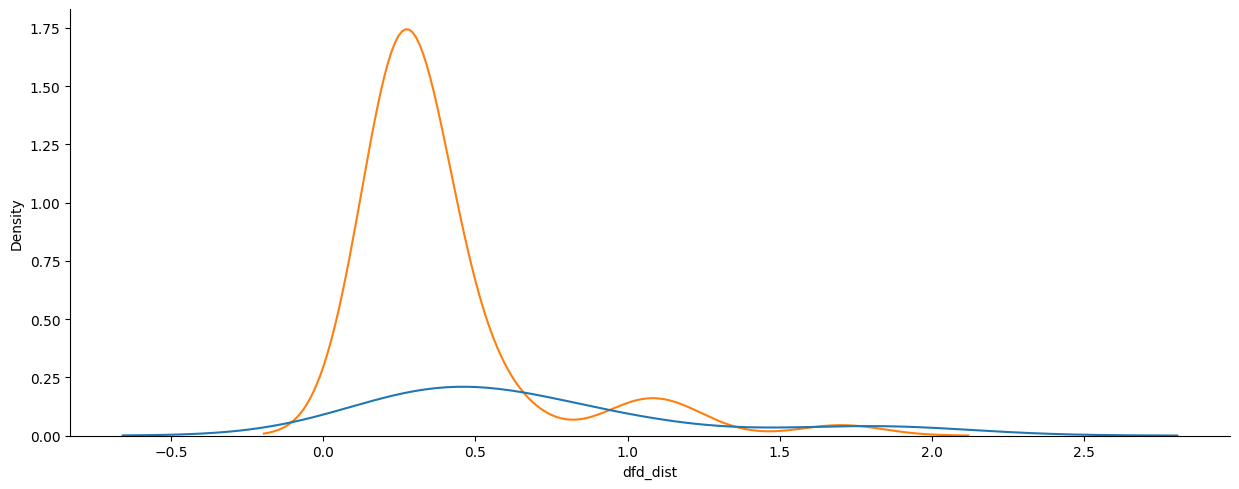

In [66]:
sns_plot = sns.displot(data=pred_df, x="dfd_dist", hue="correct", color='blue', kind="kde", legend=False, height=5, aspect=2.5)